# 붓꽃 분류

## 패키지 로딩

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd

## 데이터 로딩 및 분리

In [3]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10, stratify=y)

## 모델 생성 및 학습

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 예측 및 평가

In [5]:
y_hat = knn.predict(x_test)
print(f'정확도 : {metrics.accuracy_score(y_test, y_hat):.3f}')

정확도 : 1.000


## 최적의 K 찾기

In [7]:
k = 10
acc_scores = np.zeros(k)
for k in range(1, k+1):
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    y_hat = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_hat)
    acc_scores[k-1] = acc

print(f'최적의 K는 {np.argmax(acc_scores)+1}이며, 정확도는 {acc_scores[np.argmax(acc_scores)]:.3f}이다.')

최적의 K는 1이며, 정확도는 1.000이다.


# MNIST 손글씨 분류
- MNIST(Modified National Institute of Standards and Technology)

## 데이터 로딩
- fetch_openml: 데이터 및 실험을 위해 공개 저장소인 openml.org에서 공개 데이터 셋을 가져온다.

In [12]:
from sklearn.datasets import fetch_openml
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1, parser='pandas')
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


## 데이터 모양 확인
- 전체 70,000개의 손글씨 이미지 데이터, 784개의 특성값(28x28 크기 이미지)을 가지고 있다.

In [20]:
x = mnist.data
y = mnist.target
print(type(x))
print(x.shape, y.shape)
# print(x.head(1))
# print(x.iloc[0].values.reshape((28,28)))

<class 'pandas.core.frame.DataFrame'>
(70000, 784) (70000,)


## 숫자 데이터 이미지 시각화

1


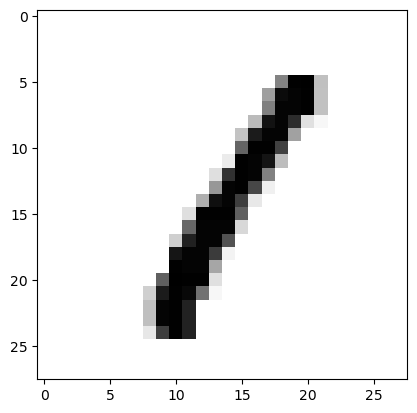

In [24]:
import matplotlib.pyplot as plt

data = x.iloc[3].values.reshape((28,28))
target = y[3] 
print(target)
plt.imshow(data, cmap = 'binary')
plt.show()

## 학습 데이터/평가 데이터 분리
- MNISt 데이터셋은 앞쪽 60,000개는 학습 데이터로, 뒤쪽 10,000개는 평가 데이터로 사용하도록 나뉘어 있다.

In [25]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

## 모델 생성 및 학습

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

## 예측 및 평가

In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_hat = knn.predict(x_test)
print(f'정확도:{accuracy_score(y_test, y_hat):.3f}')
print(f'AUC:{roc_auc_score(y_test, knn.predict_proba(x_test), multi_class="ovo"):.3f}') # 클래스의 양이 많아서 ovo로 처리

정확도:0.969
AUC:0.995


In [30]:
print(knn.predict(data.reshape(1,-1)))

['1']


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(28, 28)


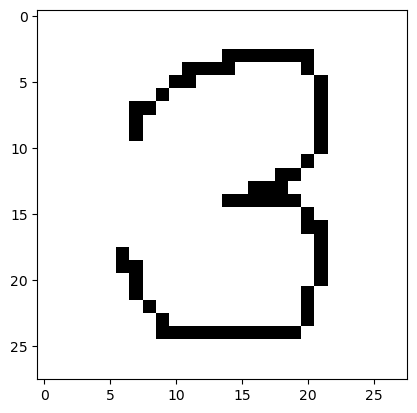

In [41]:
from PIL import Image

image = Image.open('./datasets/4.png')
image = image.convert('L') # L : greyscale (흑백)
img_ndarray = np.array(image)
img_ndarray = np.where(img_ndarray==255, 0, 255-img_ndarray) # 255:검은색
print(img_ndarray.shape)
plt.imshow(img_ndarray, cmap='binary')
plt.show()

In [42]:
print(knn.predict(img_ndarray.reshape(1,-1)))

['3']


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
